<div class="alert alert-warning">

**Source Material**:

The following exercises are adapted from Chapter 7 of [Mark Newman's book, "Computational Physics"](http://www-personal.umich.edu/~mejn/cp/)

</div>


# Exercises: Applications of DFTs

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

%matplotlib inline

### Sunspot Data Analysis 

(1.6.1a) Read in the `sunspots.txt` data as a 2-D array.
This file contains the number of recorded sunspots in a given month over a timespan of hundreds of years.

There are two columns of numbers (separated by tabs) in the data.
The first column is the number of the recorded month.
The second column is the number of sunspots recorded in that month. 

Use the following code to read in this data:

```python
with open("data/sunspots.txt", "r") as F:
    # Produces a shape-(N, 2) array
    # column-0: month number
    # column-1: count of sunspots that month
    data = np.array([[float(i) for i in j.split('\t')] for j in F])
    
```

Once you read in the data, determine: how many months are accounted for in this dataset?
What are the range (minimum and maximum) of number of sunspots per month recorded in this dataset?

Plot this data with labeled axes.

Total number of months: 3143
Range of sunspot counts: (0.0, 253.8)


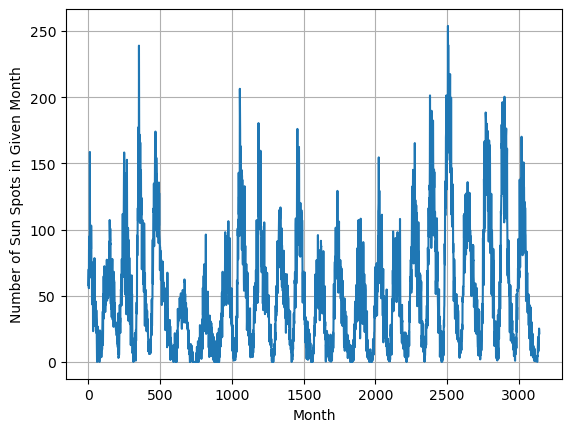

In [3]:
# STUDENT CODE HERE
with open("data/sunspots.txt", "r") as F:
    data = np.array([[float(i) for i in j.split("\t")] for j in F])

print(f"Total number of months: {len(data)}")
print(f"Range of sunspot counts: {data[:, 1].min(), data[:, 1].max()}")

x = data[:, 0]
y = data[:, 1]
fig, ax = plt.subplots()

ax.plot(x, y)
ax.grid()
ax.set_xlabel("Month")
ax.set_ylabel("Number of Sun Spots in Given Month");

(1.6.1b) Estimate the frequency of the slowly-oscillating pattern in the data that manifests between the major peaks that we see in the plot.
Do this by visual inspection (you can click on the box button in the bottom-left of the plot to do a box-zoom); determine roughly the number of months that separate consecutive peaks, and then convert this into a frequency (with units of 1/month).

> 1.6.1b Solution: *SOLUTION HERE*
A peak occurs roughly every $100$ months.
Thus the frequency is approximately $0.01$ [1/months]

(1.6.2) Take a DFT of this real-valued data and plot the Fourier spectrum, $|a_{k}|$ vs $\nu_{k}$, to evaluate the periodicity of the data. Make sure your frequencies, $\nu_{k}$, represent the appropriate physical units of `1/months`.

Tips:
- Figure out what the duration, $T$, of this data is (in months) (recall that the end-point is not included in the samples, so the duration might not be *quite* as straightforward as you might expect).
- Determine the number of samples, $N$, in the dataset.
- Compute $(c_k)_{k=0}^{\lfloor \frac{N}{2} \rfloor}$ for the data and then convert these to $(|a_k|)_{k=0}^{\lfloor \frac{N}{2} \rfloor}$ so that you can plot the Fourier spectrum.
- Make sure you compute the appropriate $\nu_k$ in `1/months` for each $|a_k|$.

/var/folders/rk/9p1bkflx7xqfp9blzn6sypv00000gn/T/ipykernel_16577/546004887.py:44: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax.stem(freqs, amps, basefmt=" ", use_line_collection=True)


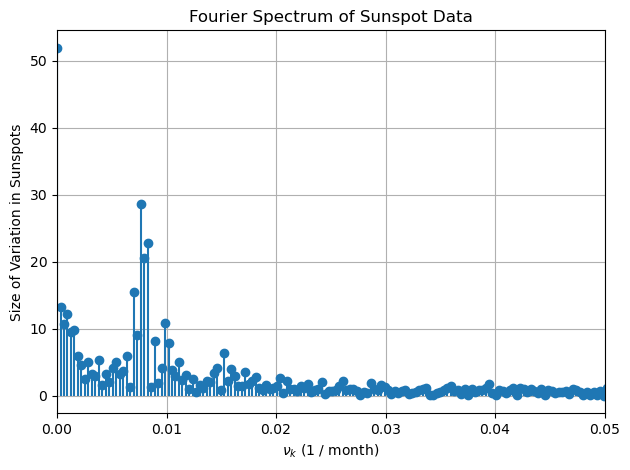

In [4]:
# STUDENT CODE HERE
def fourier_complex_to_real(
    complex_coeffs: np.ndarray, N: int
) -> Tuple[np.ndarray, np.ndarray]:
    """
    Converts complex-valued Fourier coefficients (of 
    real-valued data) to the associated amplitudes and 
    phase-shifts of the real-valued sinusoids
    
    Parameters
    ----------
    complex_coeffs : numpy.ndarray, shape-(N//2 + 1,)
        The complex valued Fourier coefficients for k=0, 1, ...
    
    N : int
        The number of samples that the DFT was performed on.
    
    Returns
    -------
    Tuple[numpy.ndarray, numpy.ndarray]
        (amplitudes, phase-shifts)
        Two real-valued, shape-(N//2 + 1,) arrays
    """
    amplitudes = np.abs(complex_coeffs) / N

    # |a_k| = 2 |c_k| / N for all k except for
    # k=0 and k=N/2 (only if N is even)
    # where |a_k| = |c_k| / N
    amplitudes[1 : (-1 if N % 2 == 0 else None)] *= 2

    phases = np.arctan2(-complex_coeffs.imag, complex_coeffs.real)
    return amplitudes, phases


fig, ax = plt.subplots()

# Compute duration of "signal" based on DFT
# sampling scheme. Recall that the end-point is not included
# in the sampled
T = x[-1] + (x[-1] - x[-2])
freqs = np.arange(len(y) // 2 + 1) / T
amps, phases = fourier_complex_to_real(np.fft.rfft(y), N=len(y))

ax.stem(freqs, amps, basefmt=" ", use_line_collection=True)
ax.set_xlim(0, 0.05)
ax.grid()
ax.set_xlabel(r"$\nu_{k}$" + " (1 / month)")
ax.set_ylabel("Size of Variation in Sunspots")
ax.set_title("Fourier Spectrum of Sunspot Data")
fig.tight_layout()

(1.6.3) What is the cause of the large peak at $k = 0$?
Study the form of the equation for the discrete Fourier transform, specifically for $c_{k=0}$.
What is the simple relationship between $c_{k=0}$ and the data $({y_{n}})_{n=0}^{N-1}$?
Uniformly adjust the sunspot data so that $c_{k=0} \approx 0$ when you take the Fourier transform of this updated data, and plot the Fourier spectrum of the new data.

> *SOLUTION HERE*

/var/folders/rk/9p1bkflx7xqfp9blzn6sypv00000gn/T/ipykernel_16577/682058854.py:7: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax.stem(freqs, amps, basefmt=" ", use_line_collection=True)


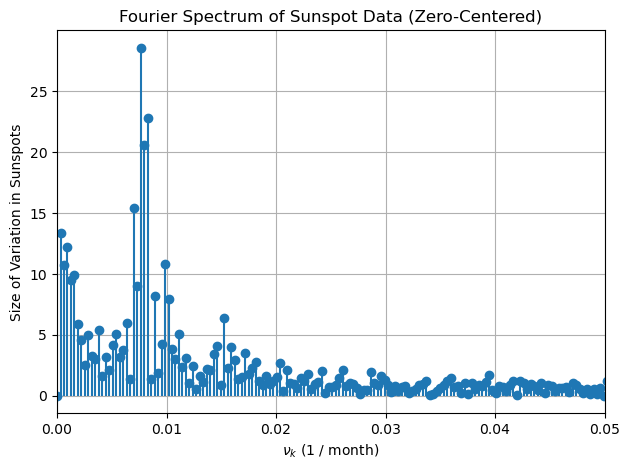

In [5]:
# STUDENT CODE HERE
fig, ax = plt.subplots()

yp = y - y.mean()  # shift the data so that c_0 = 0
amps, phases = fourier_complex_to_real(np.fft.rfft(yp), N=len(y))

ax.stem(freqs, amps, basefmt=" ", use_line_collection=True)
ax.set_xlim(0, 0.05)
ax.grid()
ax.set_xlabel(r"$\nu_{k}$" + " (1 / month)")
ax.set_ylabel("Size of Variation in Sunspots")
ax.set_title("Fourier Spectrum of Sunspot Data (Zero-Centered)")
fig.tight_layout()

Do you see a prominent peak in this Fourier spectrum in correspondence with the period that you estimated? Make sure to check your results with a neighbor or TA.

### Analyzing Audio Signals from Instruments

(1.6.4) Read in the digital audio signal for a trumpet, from `data/trumpet.txt`, as an array of integers.
This signal was recorded at a rate of $44,100\;\mathrm{Hz}$, which is the defacto standard for audio sampling (as implemented by Sony).

You can read in the digital samples with the code:

```python
with open("data/trumpet.txt", 'r') as R:
    # each sample is written to a single line in the text file
    # this reads them in as a single integer-valued numpy array
    data = np.asarray([int(i) for i in R])
```

Plot the sampled data vs time. Be sure that the time values you use are calculated appropriately such that they reflect units of seconds. Label x axis appropriately.
**There is too much data to be plotted, so plot only every 100th datapoint**.

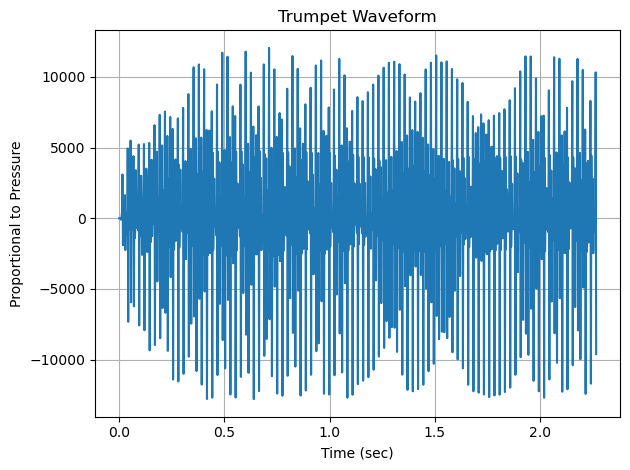

In [6]:
# plot signal
# STUDENT CODE HERE
with open("data/trumpet.txt", "r") as R:
    data = np.asarray([int(i) for i in R])

fig, ax = plt.subplots()
t = np.arange(len(data)) / 44100
ax.plot(t[::100], data[::100])
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Proportional to Pressure")
ax.set_title("Trumpet Waveform")
ax.grid(True)
fig.tight_layout()

Now, play the audio (using *all* of the data) using

```python
from IPython.display import Audio
Audio(data, rate=???)  # <- specify the sampling rate for this data
```

In [8]:
# playing audio signal
# STUDENT CODE HERE
from IPython.display import Audio

Audio(data, rate=44100)

(1.6.5) Plot the Fourier spectrum, $|a_{k}|$ vs $\nu_{k}$, for the first $10,000$ $k$-values.
Be sure to use NumPy's fast Fourier transform (not the plain DFT) for real-valued data (`np.fft.rfft`). We are working with a lot of data, so the standard DFT would be slow.

Make sure that the frequency values $\nu_{k}$ are scaled to have the appropriate units (Hz). Tip: determine out the number of samples, $N$, and as well as the duration of the sample, $T$. Don't merely estimate $T$ based on the audio player. Compute the actual value; we have all required information to do so.


Inspect Fourier spectrum -- [what notes are being played](http://www.phy.mtu.edu/~suits/notefreqs.html)?


/var/folders/rk/9p1bkflx7xqfp9blzn6sypv00000gn/T/ipykernel_16577/1509113587.py:9: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax.stem(freqs[:10_000], amps[:10_000], basefmt=" ", use_line_collection=True)


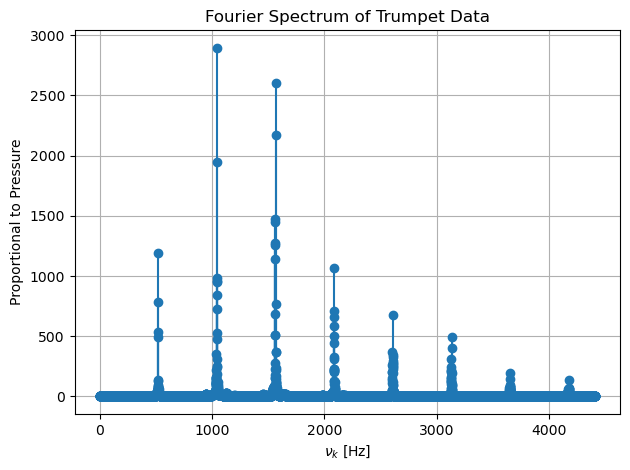

In [9]:
# STUDENT CODE HERE
T = (len(data) + 1) / 44_100  # num samples / sample-rate -> duration (seconds)

ck = np.fft.rfft(data)
freqs = np.arange(len(data) // 2 + 1) / T
amps, phases = fourier_complex_to_real(ck, N=len(data))

fig, ax = plt.subplots()
ax.stem(freqs[:10_000], amps[:10_000], basefmt=" ", use_line_collection=True)
# ax.set_yscale("log")
# ax.set_ylim(1, None)
ax.grid(True)
ax.set_xlabel(r"$\nu_{k}$" + " [Hz]")
ax.set_ylabel("Proportional to Pressure")
ax.set_title("Fourier Spectrum of Trumpet Data")
fig.tight_layout()

Let's try manipulating this audio signal via its Fourier coefficients.

First, make a copy of the complex-valued Fourier coefficients, $(c_k)_{k=0}^{\lfloor \frac{N}{2} \rfloor}$, to a new array. 
Then find all of the coefficient such that $|a_{k}| > 100$ and **set those complex-valued coefficients to 0**.
Next, take the inverse Fourier transform (`np.fft.irfft`) of the now-modified set of complex-valued Fourier coefficients, to produce a "mutated" collection of samples $(y^{\text{mutated}}_n)_{n=0}^{N-1}$.
This is a new set of audio samples, but with those Fourier components removed from the samples!

In [10]:
# STUDENT CODE HERE
new_ck = np.copy(ck)
new_ck[amps > 100] = 0
new_trumpet = np.fft.irfft(new_ck)

The result of this is a mutated version of the digital trumpet signal.
Plot the wave form of this mutated signal against time (seconds).

**Only plot every $100^\text{th}$ sample.**

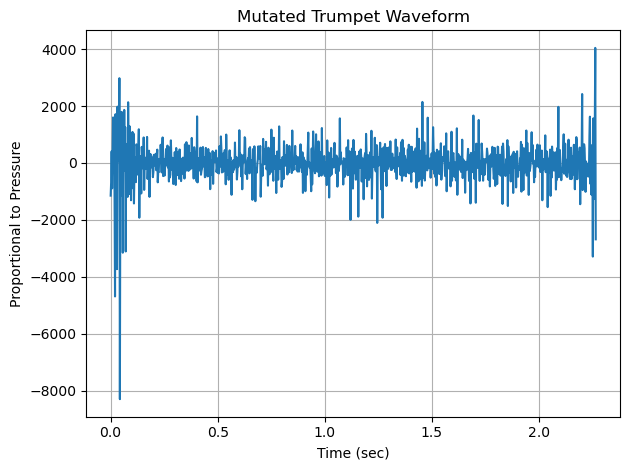

In [11]:
# STUDENT CODE HERE
fig, ax = plt.subplots()
t = np.arange(len(new_trumpet)) / 44100
ax.plot(t[::100], new_trumpet[::100])
ax.set_xlabel("Time (sec)")
ax.set_ylabel("Proportional to Pressure")
ax.set_title("Mutated Trumpet Waveform")
ax.grid(True)
fig.tight_layout();

Play the audio from mutated set of samples. The sampling rate for the `Audio` player is still $44,100$.

Consider what filtering you performed on the Fourier coefficients and how this affected the audio sample.
Does this make sense to you?
Chat with a neighbor about this. 

In [12]:
# STUDENT CODE HERE
Audio(new_trumpet, rate=44100)

(1.6.6) Repeat all of the steps of analysis that you did for the trumpet, but for the piano audio signal `"data/piano.txt"`. But feel free to be creative with how you ultimately mutate its audio.

Consider plotting the Fourier spectrum for the piano on a log-amplitude (y) scale, with

```python
ax.set_yscale('log')
ax.set_ylim(1, None)
```

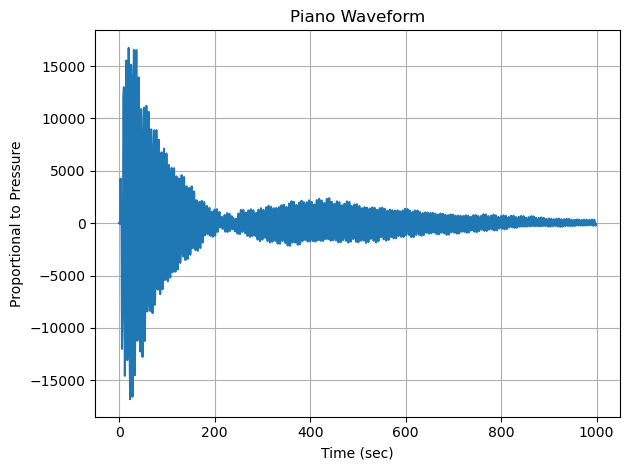

In [13]:
# plot signal
# STUDENT CODE HERE
with open("data/piano.txt", "r") as R:
    data = np.asarray([int(i) for i in R])

fig, ax = plt.subplots()
ax.plot(data[::100])
ax.set_xlabel("Time (sec)")
ax.set_title("Piano Waveform")
ax.set_ylabel("Proportional to Pressure")
ax.grid(True)
fig.tight_layout()

In [14]:
# play audio signal
# STUDENT CODE HERE
Audio(data, rate=44100)

/var/folders/rk/9p1bkflx7xqfp9blzn6sypv00000gn/T/ipykernel_16577/1833742428.py:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax.stem(freqs[:10000], amps[:10000], basefmt=" ", use_line_collection=True)


Text(0, 0.5, 'Proportional to Pressure')

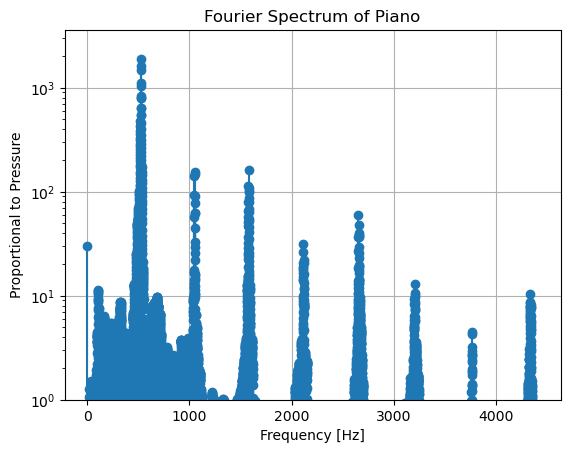

In [15]:
# fourier transform
# STUDENT CODE HERE
ck = np.fft.rfft(data)
T = (len(data) + 1) / 44100  # num samples / sample-rate -> duration (seconds)
freqs = np.arange(len(data) // 2 + 1) / T
amps, phases = fourier_complex_to_real(ck, N=len(data))

fig, ax = plt.subplots()

ax.stem(freqs[:10000], amps[:10000], basefmt=" ", use_line_collection=True)
ax.set_yscale("log")
ax.set_ylim(1, None)
ax.grid(True)
ax.set_title("Fourier Spectrum of Piano")
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Proportional to Pressure")

In [17]:
# mutate signal
# STUDENT CODE HERE
new_ck = np.copy(ck)
new_ck[amps > 100] = 0
new_piano = np.fft.irfft(new_ck)

# play audio signal
# STUDENT CODE HERE
Audio(new_piano, rate=44100)

### Smoothing Stock Market Data

(1.6.7) Read in the stock market data from `data/dow.txt`.
Each data point corresponds to the **daily** closing value of the Dow Jones Industrial Average (starting in late 2006 and ending in late 2010).
Use the following code to read in the data:

```python
with open("data/dow.txt", 'r') as R:
    # Each row of the txt file contains the closing value of the market in "points"
    # This data is read in as a numpy array of floating point values
    data = np.asarray([float(i) for i in R])
```

Plot the data on labeled axes.

Text(0, 0.5, 'Dow Jones Industrial Average')

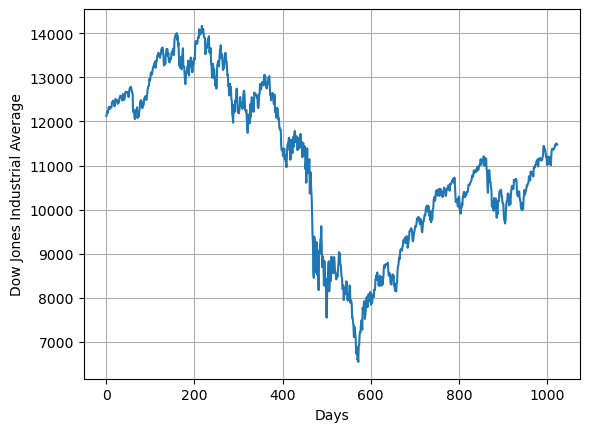

In [18]:
# STUDENT CODE HERE
with open("data/dow.txt", "r") as R:
    data = np.asarray([float(i) for i in R])

fig, ax = plt.subplots()
ax.plot(data)
ax.grid()
ax.set_xlabel("Days")
ax.set_ylabel("Dow Jones Industrial Average")

(1.6.8a) Note that this data looks roughly like a single period of a sine-wave.
By visually inspecting this plot, what, roughly, are the frequency and amplitude of this sine wave?
Answer with appropriate units.

> 1.6.8a Solution: *SOLUTION HERE*

(1.6.8b) Perform an FFT on this real-valued data, and plot the Fourier spectrum for this data.
The $\nu_{k}$-axis should be scaled to be in units of $\frac{1}{\text{days}}$.
Label your axes.

Some tips:

- Zero-center your data (such that its mean-value is $0$) so that $|a_0|$ doesn't dominate your Fourier spectrum
- Plot on the domain $[0, 0.04]$ (units 1 / days) using `ax.set_xlim(0, 0.04)`

Do you see a peak in correspondence to the sinusoidal form discussed in 1.6.8a?
Does the frequency and amplitude of this prominent peak make sense?

/var/folders/rk/9p1bkflx7xqfp9blzn6sypv00000gn/T/ipykernel_16577/284665017.py:11: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax.stem(freqs[:10000], amps[:10000], basefmt=" ", use_line_collection=True)


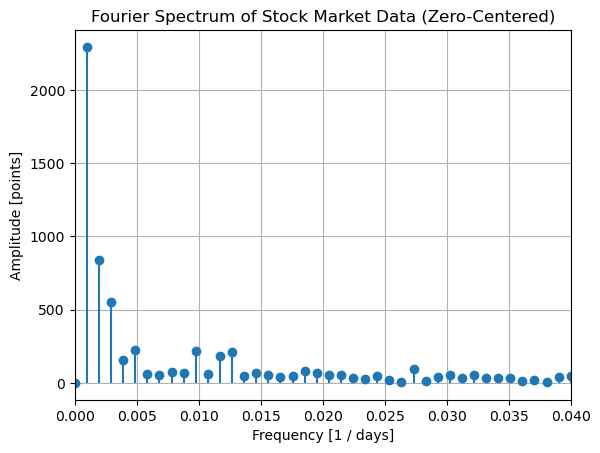

In [19]:
# STUDENT CODE HERE
T = len(data) + 1

ck = np.fft.rfft(data - data.mean())
freqs = np.arange(len(ck)) / T  # frequency in 1 / days

amps, phases = fourier_complex_to_real(ck, N=len(data))

fig, ax = plt.subplots()

ax.stem(freqs[:10000], amps[:10000], basefmt=" ", use_line_collection=True)

ax.set_xlabel("Frequency [1 / days]")
ax.set_ylabel("Amplitude [points]")
ax.set_title("Fourier Spectrum of Stock Market Data (Zero-Centered)")
ax.set_xlim(0, 0.04)
ax.grid(True)

(1.6.9) We want to smooth this stock market data.
We can do this by "removing" the high-frequency coefficients of its Fourier spectrum.
Try zeroing-out the top $90\%$ high-frequency complex-valued coefficients $c_k$, and then perform an inverse FFT using these altered coefficients.Plot these "smoothed" samples on top of a semi-transparent version of the original data (use the plot parameter `alpha=0.5`).

Then repeat this process, but with zeroing out the top $98\%$ coefficients.
In both of these cases,**on what times scales are the fluctuations being filtered out?**

> *SOLUTION HERE*

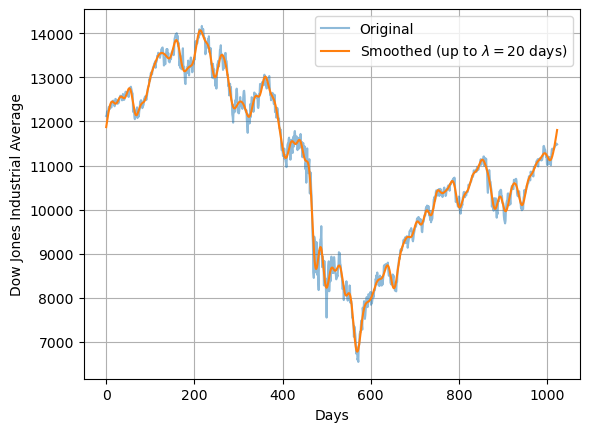

In [20]:
# filter top 90% high frequencies
# STUDENT CODE HERE
ck = np.fft.rfft(data)
ck[round(0.1 * len(ck)) :] = 0  # set all coefficients past the first 10% to 0
smooth = np.fft.irfft(ck)

fig, ax = plt.subplots()
ax.plot(data, alpha=0.5, label="Original")
ax.plot(smooth, label=r"Smoothed (up to $\lambda=20$ days)")
ax.set_xlabel("Days")
ax.set_ylabel("Dow Jones Industrial Average")
ax.grid(True)
ax.legend()

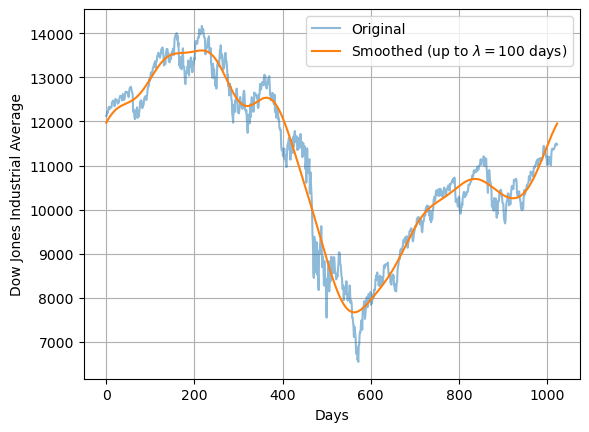

In [21]:
# filter top 98% high frequencies
# STUDENT CODE HERE
ck = np.fft.rfft(data)
ck[round(0.02 * len(ck)) :] = 0
smooth = np.fft.irfft(ck)

fig, ax = plt.subplots()
ax.plot(data, alpha=0.5, label="Original")
ax.plot(smooth, label=r"Smoothed (up to $\lambda=100$ days)")
ax.set_xlabel("Days")
ax.set_ylabel("Dow Jones Industrial Average")
ax.grid(True)
ax.legend()

(1.6.10) Now repeat this process but zero-out the bottom $10\%$ **low-frequency** coefficients.
What do you see?
Why is there a huge down-shift in the recovered data? (Hint: recall the role of $c_{k=0}$).
What would happen if you filtered out the bottom $10\%$ low-frequency coefficients **except** for $c_{0}$?
Try this.

>  *SOLUTION HERE*

Text(0, 0.5, 'Dow Jones Industrial Average')

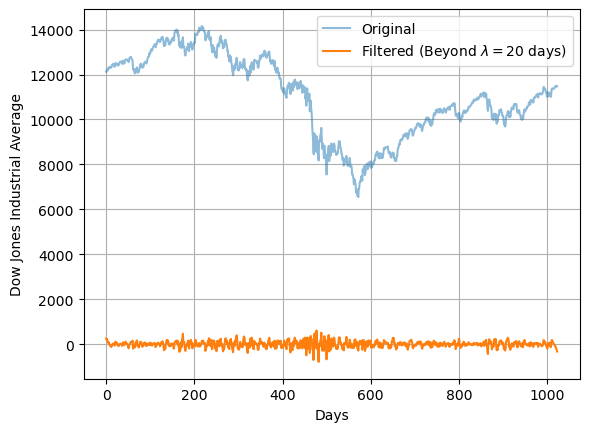

In [22]:
# filter bottom 10% low frequencies
# STUDENT CODE HERE
ck = np.fft.rfft(data)
ck[: round(0.1 * len(ck))] = 0
smooth = np.fft.irfft(ck)

fig, ax = plt.subplots()
ax.plot(data, alpha=0.5, label="Original")
ax.plot(smooth, label=r"Filtered (Beyond $\lambda=20$ days)")
ax.legend()
ax.grid(True)
ax.set_xlabel("Days")
ax.set_ylabel("Dow Jones Industrial Average")

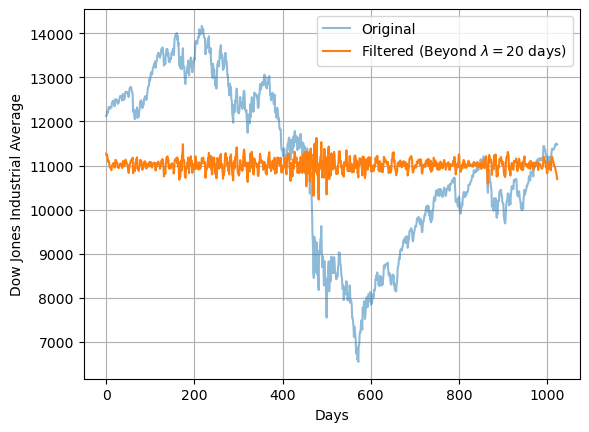

In [23]:
# filter bottom 10% low frequencies, except c0
# STUDENT CODE HERE
ck = np.fft.rfft(data)
ck[1 : round(0.1 * len(ck))] = 0
smooth = np.fft.irfft(ck)

fig, ax = plt.subplots()
ax.plot(data, alpha=0.5, label="Original")
ax.plot(smooth, label=r"Filtered (Beyond $\lambda=20$ days)")
ax.legend()
ax.grid(True)
ax.set_xlabel("Days")
ax.set_ylabel("Dow Jones Industrial Average");